# Predicting Solar Energy Production with Machine Learning

In [3]:
import pyspark
from pyspark import SparkConf
from pyspark import SparkContext
from pyspark.sql import SQLContext
import matplotlib
import matplotlib.pyplot as plt
from pyspark.sql import Row
from pyspark.sql.functions import UserDefinedFunction
from pyspark.sql.types import *
import atexit
from numpy import array
import numpy as np
import datetime
import pixiedust

Pixiedust database opened successfully
Table VERSION_TRACKER created successfully
Table METRICS_TRACKER created successfully

Share anonymous install statistics? (opt-out instructions)

PixieDust will record metadata on its environment the next time the package is installed or updated. The data is anonymized and aggregated to help plan for future releases, and records only the following values:

{
   "data_sent": currentDate,
   "runtime": "python",
   "application_version": currentPixiedustVersion,
   "space_id": nonIdentifyingUniqueId,
   "config": {
       "repository_id": "https://github.com/ibm-watson-data-lab/pixiedust",
       "target_runtimes": ["Data Science Experience"],
       "event_id": "web",
       "event_organizer": "dev-journeys"
   }
}
You can opt out by calling pixiedust.optOut() in a new cell.


Pixiedust runtime updated. Please restart kernel
Table SPARK_PACKAGES created successfully
Table USER_PREFERENCES created successfully
Table service_connections created successfully


In [4]:
# The code was removed by Watson Studio for sharing.

In [5]:
#df_data_1.count()

In [6]:
df_data_1.cache() # Cache data for faster reuse

DataFrame[Data Provider: string, System ID (from Data Provider): string, System ID (Tracking the Sun): string, Installation Date: string, System Size: string, Total Installed Price: string, Appraised Value Flag: string, Sales Tax Cost: string, Rebate or Grant: string, Performance-Based Incentive (Annual Payment): string, Performance-Based Incentives (Duration): string, Feed-in Tariff (Annual Payment): string, Feed-in Tariff (Duration): string, Customer Segment: string, New Construction: string, Tracking: string, Tracking Type: string, Ground Mounted: string, Battery System: string, Zip Code: string, City: string, County: string, State: string, Utility Service Territory: string, Third-Party Owned: string, Installer Name: string, Self-Installed: string, Azimuth #1: string, Azimuth #2: string, Azimuth #3: string, Tilt #1: string, Tilt #2: string, Tilt #3: string, Module Manufacturer #1: string, Module Model #1: string, Module Manufacturer #2: string, Module Model #2: string, Module Manufa

In [7]:
#df_data_1.dtypes

In [8]:
# REGISTER DATA-FRAME AS A TEMP-TABLE IN SQL-CONTEXT
df_data_1.createOrReplaceTempView("track_sun")

In [9]:
sql_df = spark.sql("SELECT count(*) FROM track_sun WHERE Tracking != -9999")

## Filter System size and Total installed price colums with -9999

In [10]:
trackingDf = df_data_1.filter(df_data_1['Total Installed Price'] != "-9999").filter(df_data_1['System Size'] != "-9999")

In [11]:
df_data_1.select(df_data_1['Module Efficiency #1'].cast(FloatType())).describe().show()


+-------+--------------------+
|summary|Module Efficiency #1|
+-------+--------------------+
|  count|              700000|
|   mean| -1853.2513051158517|
| stddev|   3885.548676665406|
|    min|             -9999.0|
|    max|          0.22699386|
+-------+--------------------+



In [24]:
trackingDf_castd = trackingDf.select(trackingDf['Total Installed Price'].cast(FloatType()),
                                    trackingDf['System Size'].cast(FloatType())
                                    , trackingDf['Sales Tax Cost'].cast(FloatType())
                                    , trackingDf['Rebate or Grant'].cast(FloatType())
                                    , trackingDf['Performance-Based Incentive (Annual Payment)'].cast(FloatType())
                                    , trackingDf['Performance-Based Incentives (Duration)'].cast(FloatType())
                                    , trackingDf['Feed-in Tariff (Annual Payment)'].cast(FloatType())
                                    , trackingDf['Feed-in Tariff (Duration)'].cast(IntegerType())
                                    , trackingDf['Module Efficiency #1'].cast(IntegerType())                                              
                                    , trackingDf['Module Efficiency #2'].cast(IntegerType())                                              
                                    , trackingDf['Module Efficiency #3'].cast(IntegerType())                                                                
                                    )                                                                          

In [25]:
trackingDf.columns

['Data Provider',
 'System ID (from Data Provider)',
 'System ID (Tracking the Sun)',
 'Installation Date',
 'System Size',
 'Total Installed Price',
 'Appraised Value Flag',
 'Sales Tax Cost',
 'Rebate or Grant',
 'Performance-Based Incentive (Annual Payment)',
 'Performance-Based Incentives (Duration)',
 'Feed-in Tariff (Annual Payment)',
 'Feed-in Tariff (Duration)',
 'Customer Segment',
 'New Construction',
 'Tracking',
 'Tracking Type',
 'Ground Mounted',
 'Battery System',
 'Zip Code',
 'City',
 'County',
 'State',
 'Utility Service Territory',
 'Third-Party Owned',
 'Installer Name',
 'Self-Installed',
 'Azimuth #1',
 'Azimuth #2',
 'Azimuth #3',
 'Tilt #1',
 'Tilt #2',
 'Tilt #3',
 'Module Manufacturer #1',
 'Module Model #1',
 'Module Manufacturer #2',
 'Module Model #2',
 'Module Manufacturer #3',
 'Module Model #3',
 'Additional module model',
 'Module Technology #1',
 'Module Technology #2',
 'Module Technology #3',
 'BIPV Module #1',
 'BIPV Module #2',
 'BIPV Module #3',
 

In [21]:
display(trackingDf_castd.describe())

summary,Total Installed Price,System Size,Sales Tax Cost,Rebate or Grant,Performance-Based Incentive (Annual Payment),Performance-Based Incentives (Duration),Feed-in Tariff (Annual Payment),Feed-in Tariff (Duration),Module Efficiency #1,Module Efficiency #2,Module Efficiency #3
count,535445,535445,535445,535445,535445,535445,535445,535445,535421,535444,535445
mean,53391.12752417413,26.46287867808228,1160.1415179901787,1895.051495235391,397.63731854954614,0.05758948164610744,0.0,0.0,-1334.9840872883208,-9868.467189846184,-9993.939295352464
stddev,6591741.707723985,5947.438191332911,8556.86808465707,26170.778064530277,9512.704754793027,0.8266549637917319,0.0,0.0,3400.9329569722613,1134.9718762959121,224.8921285774028
min,0.01,0.12,-9999.0,-9999.0,0.0,0.0,0.0,0,-9999,-9999,-9999
max,4.8065848E9,4001172.0,655574.4,4317390.0,1742083.0,20.0,0.0,0,0,0,0


In [21]:
sampledf = trackingDf_castd.sample(False, 0.1, 42)
sampledf.col('Total Installed Price')

Column<b'Total Installed Price'>


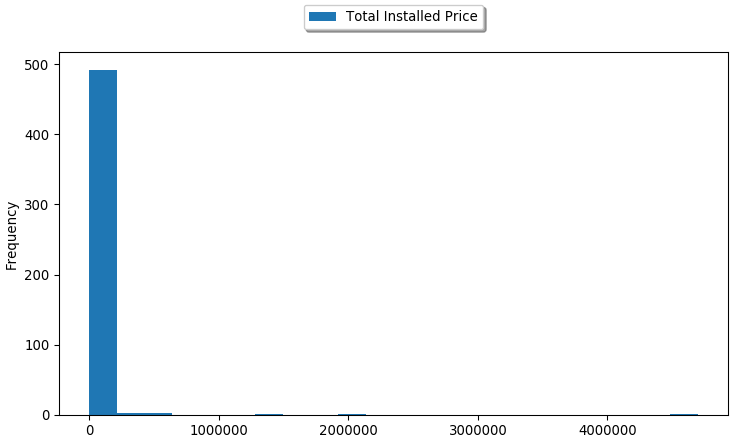

In [23]:
display(trackingDf_castd.sample(False, 0.2, 42))

In [52]:
df_data_1.select('Module Efficiency #2').describe().show()

+-------+--------------------+
|summary|Module Efficiency #2|
+-------+--------------------+
|  count|              700000|
|   mean|  -9868.696663363797|
| stddev|  1133.9959269370293|
|    min|        -1.75018E-05|
|    max|         0.220858896|
+-------+--------------------+



In [12]:
df_data_1.select('Azimuth #1').show(10)

+----------+
|Azimuth #1|
+----------+
|     -9999|
|     -9999|
|     -9999|
|     -9999|
|     -9999|
|     -9999|
|     -9999|
|     -9999|
|     -9999|
|     -9999|
+----------+
only showing top 10 rows

